# Homework 4 - Decision Trees / Random Forests

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart disease. It's the same data set as from HW3, so that way you'll be familiar with it.

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: female or male (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death: if the patient died during the follow-up period (boolean) 

For each ```boolean``` variable, a value of 1 = True and 0 = False. For sex, female = 0 and male = 1.


### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict patient survival
- Find if there are any important features related to patient survival

In this assignment, we will be using Clustering to identify clusters of patients, then seeing how well the various clustering methods work against the true clusters (classes). A good resource to use would be [Sci-Kit Learn's Clustering info](https://scikit-learn.org/stable/modules/clustering.html)

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW4.ipynb

If you submit a zip file or anything else, you will receive -5 points.

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using. Add any you want to use.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own.


In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data to remember what it looks like:

In [2]:
heart_df = pd.read_csv('data_hw4.csv')
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Part 1: Visual Analysis

In this HW, since you've had plenty of experience with visual analysis in general and on this data set, we are going to skip this part.

### Part 2: Clustering

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be entirely on your own, with less detailed instructions. If you have any questions, check out your previous labs, the lecture notes, or the just google the specific function to see how to use it.

Your checklist of items to do will be as such:

1. Scale the data (5 pts)
2. Split it into training/testing sets (5 pts)
3. Cluster the patients using the 3 methods imported from sklearn.clustering (see above) (40 pts)
- As a note, you'll want to try and optimize the parameters within these models to have good accuracy as well as good generalization (no overfitting). 
- Also, if you can, try and rank your features to get a kind of feature importance (Think about how you might do this. There are multiple ways to do it.)
4. Write a report, which should have ample information on your methods, implementation, results, and various graphs/charts explaining how your model performed. How could you visualize the clusters or how well they performed? What issues might they have? What are some pros and cons of different methods? How well do your clustering results match the true clusters (classes)? The report has the following criteria (50 pts): 
- Should be at LEAST 2-3 paragraphs, and a paragraph is more than just 2-3 sentences.
- Explain your methods, including optimization techniques and WHY you used them
- Contain at LEAST 3 charts/graphs showcasing how well your methods predicted heart disease
- Remember, this is a data science project, so you should be thinking and exploring your data and models. What does the data tell us?

On this HW, it is very difficult to copy your friends, as it will be obvious. Cheating will result in an automatic zero, so make sure your work is original. The point of these HW assignments is for you to think, so if you simply tell me what you did or type definitions of methods to make your report seem long, you will lose points. Each HW assignment is graded in detail.

In [ ]:
############################################## DATA PROCESSING #############################################################

In [3]:
#Seperate independent variables and dependent variable
X = heart_df.drop(labels = ['death'], axis = 1)
y = heart_df['death']
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [4]:
from sklearn.preprocessing import StandardScaler
standard_Scaler = StandardScaler()
X_standardized = standard_Scaler.fit_transform(X)
X_standardized = pd.DataFrame(data = X_standardized, columns = X.columns)
X_standardized

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509


In [5]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size = 0.2, random_state = 129)
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
136,0.350833,1.147968,-0.539753,1.179830,1.854958,-0.735688,-9.356567e-01,-0.478205,0.085034,-1.359272,-0.687682,-0.300201
236,1.192945,-0.871105,-0.477812,-0.847579,1.008578,1.359272,-1.572915e-01,-0.284552,2.582144,0.735688,-0.687682,1.016195
159,-0.154434,1.147968,-0.467489,-0.847579,0.585389,1.359272,1.010256e+00,-0.284552,0.539054,0.735688,1.454161,-0.119519
198,-0.912335,1.147968,0.000166,1.179830,-1.530560,1.359272,1.601995e-01,-0.381379,-0.595996,-1.359272,-0.687682,0.719360
217,-0.575491,1.147968,-0.159848,-0.847579,2.701337,1.359272,-1.150731e+00,7.364715,0.085034,-1.359272,-0.687682,0.848419
...,...,...,...,...,...,...,...,...,...,...,...,...
248,-1.754448,-0.871105,0.043524,-0.847579,-0.260991,-0.735688,3.855158e-01,-0.381379,1.220084,0.735688,1.454161,1.080724
190,1.614001,-0.871105,0.000166,1.179830,-0.260991,-0.735688,8.873565e-01,0.683709,-0.595996,0.735688,-0.687682,0.564490
40,0.771889,-0.871105,0.000166,-0.847579,-1.530560,1.359272,7.535660e-09,0.422279,-0.595996,0.735688,1.454161,-1.281045
231,0.771889,-0.871105,-0.504653,-0.847579,-0.260991,-0.735688,-8.025153e-01,-0.284552,-0.595996,0.735688,1.454161,1.003289


In [6]:
##################################### MODEL 1 CREATION and Evaluation #######################################################

In [7]:
#Import modules for model creation and evaluation
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

In [8]:
#First model: KMeans
kmeans_model = KMeans(n_clusters=2)
kmeans_param_grid = {
                    'init': ['k-means++', 'random'],
                    'max_iter': [100, 300, 500],
                    'tol': [1e-4, 1e-5]
                     }

kmeans_grid_search = GridSearchCV(kmeans_model, param_grid = kmeans_param_grid, scoring = silhouette_score, cv = 5)
kmeans_grid_search.fit(X_train)

kmeans_best_parameters = kmeans_grid_search.best_params_

In [9]:
kmeans_best_model = KMeans(n_clusters = 2, **kmeans_best_parameters)
kmeans_best_model.fit(X_train)

KMeans(max_iter=100, n_clusters=2)

In [10]:
kmeans_train_pred = kmeans_best_model.predict(X_train)
kmeans_test_pred = kmeans_best_model.predict(X_test)
print(f"KMeans model train silhouette score: {silhouette_score(X_train, kmeans_train_pred)}")
print(f"KMeans model test silhouette score: {silhouette_score(X_test, kmeans_test_pred)}")

#The silhouette score indicates that the model is only slightly more similar to its own cluster than to the neighboring cluster.
# In this case, it is not good because we want a clear distincition between patients prediction.

KMeans model train silhouette score: 0.11096185079756939
KMeans model test silhouette score: 0.13233390739242173


In [11]:
#Performance in terms of accuracy compared to the original labels
print(f"KMeans model train accuracy score: {accuracy_score(y_train, kmeans_train_pred)}")
print(f"KMeans model test accuracy score: {accuracy_score(y_test, kmeans_test_pred)}")

#The prediciton performance of the model is only around 50% - 55% which is quite low, especially in medical application such 
# as this data set.

KMeans model train accuracy score: 0.5439330543933054
KMeans model test accuracy score: 0.48333333333333334


In [12]:
kmeans_train_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
############################################### MODEL 2 CREATION AND EVALUATION #########################################

In [13]:
#Second model is Spectral Clustering
spect_model = SpectralClustering(n_clusters = 2)
spect_param_grid = {
                    'affinity': ['nearest_neighbors', 'rbf'],
                    'n_neighbors': [5, 10, 15],
                    'gamma': [0.1, 1, 10],
                    }

spect_grid_search = GridSearchCV(spect_model, param_grid = spect_param_grid, scoring = silhouette_score, cv = 5)
spect_grid_search.fit(X_train)

spect_best_parameters = spect_grid_search.best_params_

In [14]:
spect_best_model = SpectralClustering(n_clusters = 2, **spect_best_parameters)
spect_best_model.fit_predict(X_train)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [15]:
spect_train_pred = spect_best_model.fit_predict(X_train)
spect_test_pred = spect_best_model.fit_predict(X_test)
print(f"Spectral model train silhouette score: {silhouette_score(X_train, spect_train_pred)}")
print(f"Spectral model test silhouette score: {silhouette_score(X_test, spect_test_pred)}")

#Similar to the first clustering model using KMeans, the cluster model using spectral clustering performs about the same.

Spectral model train silhouette score: 0.09633256841753476
Spectral model test silhouette score: 0.10585970035030949


In [16]:
print(f"Spectral model train accuracy score: {accuracy_score(y_train, spect_train_pred)}")
print(f"Spectral model test accuracy score: {accuracy_score(y_test, spect_test_pred)}")

#Lower accuracy score than the KMeans model

Spectral model train accuracy score: 0.4560669456066946
Spectral model test accuracy score: 0.43333333333333335


In [17]:
spect_train_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
############################################### MODEL 3 CREATION AND EVALUATION #########################################

In [18]:
#Third model using Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters = 2)
agg_param_grid = {
                'linkage': ['ward', 'complete', 'average', 'single'],
                'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],
                'compute_full_tree': [True, False],
                  }

agg_grid_search = GridSearchCV(agg_model, param_grid = agg_param_grid, scoring = silhouette_score, cv = 5)
agg_grid_search.fit(X_train)

agg_best_parameters = agg_grid_search.best_params_

In [19]:
agg_best_model = AgglomerativeClustering(n_clusters = 2, **agg_best_parameters)
agg_best_model.fit_predict(X_train)

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [20]:
agg_train_pred = agg_best_model.fit_predict(X_train)
agg_test_pred = agg_best_model.fit_predict(X_test)
print(f"Agglomerative model train silhouette score: {silhouette_score(X_train, agg_train_pred)}")
print(f"Agglomerative model test silhouette score: {silhouette_score(X_test, agg_test_pred)}")

#The third clustering model also have similar performance.

Agglomerative model train silhouette score: 0.10208773810631856
Agglomerative model test silhouette score: 0.1178537095694764


In [21]:
print(f"Agglomerative model train accuracy score: {accuracy_score(y_train, agg_train_pred)}")
print(f"Agglomerative model test accuracy score: {accuracy_score(y_test, agg_test_pred)}")

Agglomerative model train accuracy score: 0.5606694560669456
Agglomerative model test accuracy score: 0.48333333333333334


In [ ]:
#Overall it seems like using clustering algorithms to cluster between only two classes death and survived is not the best option
# since the result is non-deterministic at around ~0.1 in sihouette score and ~0.5 in accuracy score. 
# Specifically, the clustering is not able to clearly distinguish between the two classes and thus, do not provide any 
# useful information.

In [22]:
#Feature importance with KMeans
feature_importance = np.abs(kmeans_best_model.cluster_centers_.mean(axis=0))
feature_importance = feature_importance / feature_importance.sum()
sorted_idx = np.argsort(feature_importance)[::-1]
print("KMeans Feature importance ranking:")
for i in sorted_idx:
    print(f"{X_train.columns[i]}: {feature_importance[i]}")
    
#Although the KMeans model does not perform well in clustering between patients predicted to survive vs dead, we can still take
# a closer look at the features that have the most affect on the model decision. Specifically, sex, smoking, and ejection_fraction
# are the three features with the highest ranks at 0.32, 0.25, and 0.1, respectively. Overall, the higher the value for smoking,
# age, and serum_sodium, the more likely the patient will be categorize as dead.

KMeans Feature importance ranking:
sex: 0.3157974437576195
smoking: 0.2519507599771385
ejection_fraction: 0.10808778890431903
age: 0.06443798748632586
diabetes: 0.0568418504022539
high_blood_pressure: 0.04814556361144835
serum_sodium: 0.04051186962787286
platelets: 0.028945132176412904
anaemia: 0.028689803286518104
creatinine_phosphokinase: 0.021308781387614474
time: 0.01929098815433463
serum_creatinine: 0.015992031228141853


Text(0.5, 1.0, 'Spectral Model')

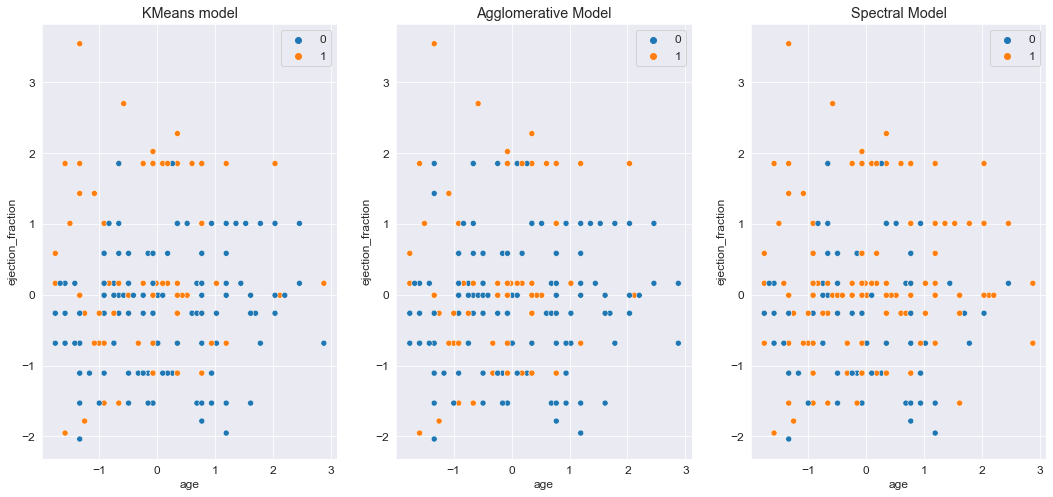

In [68]:
#Graphing the predictions of the KMeans model, Agglomerative model, and the Spectral model based on top most important features
# of the KMeans model that are not categorical in nature.
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
sns.scatterplot(x=X_train['age'], y=X_train['ejection_fraction'], hue=kmeans_train_pred, ax=axs[0])
sns.scatterplot(x=X_train['age'], y=X_train['ejection_fraction'], hue=agg_train_pred, ax=axs[1])
sns.scatterplot(x=X_train['age'], y=X_train['ejection_fraction'], hue=spect_train_pred, ax=axs[2])
axs[0].set_title("KMeans model")
axs[1].set_title("Agglomerative Model")
axs[2].set_title("Spectral Model")

#Similar to the previous results from the three model, the graph also indicate that the data is too bunch together to create
# a good clustering.

In [ ]:
################################################### BUILDING LOGISTIC REGRESSION MODEL #######################################

In [23]:
#Since the data set is a supervised data set, we will build a logistic model to see if we can get a better result than simply
# clustering.
from sklearn.linear_model import LogisticRegression

In [24]:
#Creating a logistic model (From HW3, we have discovered the best parameters for the logistic model using this data set)
model_logistic = LogisticRegression(C = 4, class_weight= None, penalty= 'l2', solver = 'lbfgs')
model_logistic.fit(X_train, y_train)

LogisticRegression(C=4)

In [25]:
y_logistic_pred = model_logistic.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_logistic_pred)
print(f"Accuracy score: {logistic_accuracy:.3f}")

#Already the performance of the logictic model is better than only clustering. However, can we improve the model even more with
# integration of a clustering method as another attribute

Accuracy score: 0.817


In [48]:
#Constructing a dbscan model to be used with the orginal X_standardized attributes set
dbscan_model = DBSCAN(eps = 4, min_samples = 6)
dbscan_model.fit(X_standardized)

dbscan_labels = dbscan_model.fit_predict(X_standardized)

In [49]:
print(dbscan_labels)

[ 0 -1  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]


In [50]:
print(f"Dbscan model accuracy score: {accuracy_score(y, abs(dbscan_labels))}")
print(f"Dbscan model silhouette score: {silhouette_score(X_standardized, dbscan_labels)}")

#Note that the performance of the dbscan model is actually decent. At the very least, it is better than the three previous 
# clutering models in terms of both accuracy score and silhouette score. Unfortunately, it is not possible to specify the number
# of clusters we want. Instead, it is up to the algorithm, so it was not used in the original evaluation of the clustering models 
# predictive capability.

Dbscan model accuracy score: 0.6956521739130435
Dbscan model silhouette score: 0.40684173277495717


In [51]:
#Now we will combine the dbscans label with X_standardized as an additional attribute
X_standardized_new = X_standardized
X_standardized_new['dbscan_result'] = abs(dbscan_labels)
X_standardized_new

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,dbscan_result
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,0
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,0
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,0
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451,0
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357,0
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697,0
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509,0


In [52]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_standardized_new, y, test_size = 0.2, random_state = 68)

In [53]:
#Creating a new logistic model
model_logistic_new = LogisticRegression(C = 4, class_weight= None, penalty= 'l2', solver = 'lbfgs')
model_logistic_new.fit(X_train_new, y_train_new)

LogisticRegression(C=4)

In [54]:
y_logistic_new_pred = model_logistic_new.predict(X_test_new)
logistic_new_accuracy = accuracy_score(y_test_new, y_logistic_new_pred)
print(f"Accuracy score: {logistic_new_accuracy:.3f}")

#The performance in terms of overall accuracy score did improve slightly with the addition of the dbscan labels column

Accuracy score: 0.833


In [57]:
from sklearn.feature_selection import RFE
rfe = RFE(model_logistic_new, n_features_to_select=3)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]

# Print the names of the selected features
print('Selected Features:', selected_features.tolist())

#using the logistic model + DBSCAN result, seems like the three highest ranking features are anamia, high_blood_pressure, and
# serum_creatinine which are all different from the KMeans importance features.

Selected Features: ['anaemia', 'high_blood_pressure', 'serum_creatinine']


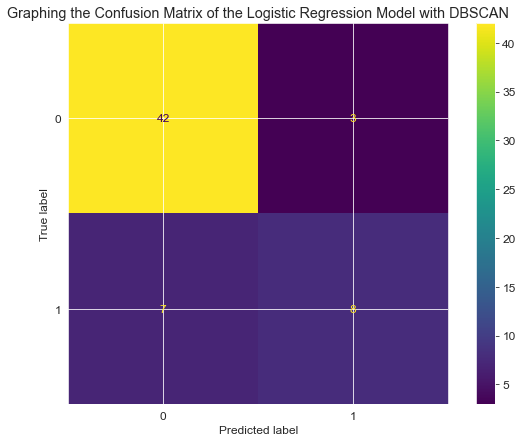

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test_new, y_logistic_new_pred))
disp.plot()
plt.title('Graphing the Confusion Matrix of the Logistic Regression Model with DBSCAN')
plt.show()

In homework 4, we continued building models for the heart disease dataset. Specifically, we tried to utilize clustering to predict the patient survival rate. Since we previously graphed many of the attributes in the dataset, we skipped the visual analysis in the assignment and immediately went to building our models. Of all the features, the highest importance for the KMeans model was sex at 0.32, smoking at 0.25, and ejection_fraction at 0.1.

We started with a KMeans model as the first model for clustering. As we experimented to see if we could cluster and differentiate between patient survival rates, we had to set the maximum allowed clusters for the model to 2, representing survived and dead. Furthermore, to keep the consistent maximum clusters in all three clustering models, we have chosen KMeans, Spectral, and Agglomerative. These three clustering algorithms allowed us to specify the top clusters to 2. After creating the KMeans model, we utilized the grid search method to find the best hyperparameters for the model. After this, we ran the model prediction through the train and test data and compared the results. Specifically, the KMeans model had an average silhouette score of 0.1 and an average accuracy score of 0.52 across both train and test data. While the results were not bad, they were not valuable since both scores indicated that the clustering model did not provide helpful information to categorize the patient's survival rate. 

We used the same testing methods for the Spectral and Agglomerative clustering models with similar results in both silhouette scores at 0.1 and 0.1, respectively. Furthermore, the average accuracy score for the Spectral was 0.55, while the average accuracy score for the Agglomerative model was 0.53. Overall similar performance to the KMeans model and did not provide any valuable information.

To find a better model to predict the patients' survival rate, we used the logistic regression model in homework 3. After implementing the model with the previous best hyperparameters found in assignment 3, the accuracy score in prediction jumped from an average of 50% to 82%. Thus, the results showed that the logistic model was much more suited to the problem than the clustering method. However, we could still improve the model further with the usage of Dbscan. In addition to using the original attributes, we built a Dbscan model, trained it, and created a new set of labels from the Dbscan model result. Afterward, we combined the Dbscan model result as a new attribute to the original dataset. We went through the logistic model training again and got a new model with an accuracy score of 83.3%, a slight improvement over the original model. Finally, we checked the logistic model's most important features and got anemia, high_blood_pressure, and serum_creatinine. These all differ from the three most essential features in the KMeans model.

After implementing clustering to predict patients' survival rates, we concluded that it was unusable as of the current testing state. The clustering models did not provide conclusive results and could not be used to predict new patient survivability. However, if the clustering algorithm was used as a supporting argument for a logistic regression model, for example, it could potentially increase its performance, as seen during the final test of the logistic model.